In [14]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

The MNIST data is a large dataset of handwritten numerical digits. More about the dataset: https://en.wikipedia.org/wiki/MNIST_database
        

The digits in the images are centred and scaled (similar sized).
We proceed by loading the data.

In [15]:
def load_data():
  # Load training and eval data
    mnist = tf.contrib.learn.datasets.load_dataset("mnist")
    train_data = mnist.train.images # Returns np.array
    train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
    test_data = mnist.test.images # Returns np.array
    test_labels = np.asarray(mnist.test.labels, dtype=np.int32)
    return train_data, train_labels, test_data, test_labels

train_data, train_labels, test_data, test_labels = load_data()

In [17]:
# What's the size of the training data?
# train_data.shape

Lets visualise a datapoint, an image in the dataset

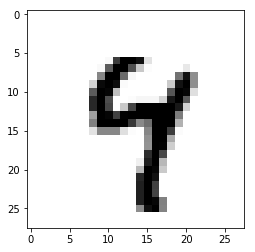

In [18]:
some_digit = train_data[2]
some_digit_image = some_digit.reshape(28,28) # reshape to square
plt.imshow(some_digit_image,cmap = plt.cm.binary,interpolation="nearest")
# plt.axis("off")
plt.show()

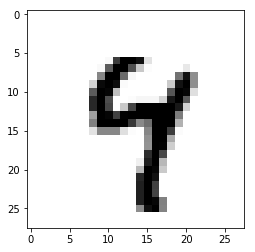

In [19]:
b = some_digit_image

plt.imshow(b,cmap = plt.cm.binary,interpolation="nearest")
# plt.axis("off")
plt.show()



Convolutional neural network the neural network structure is

    Input Layer
    Covolution layer (5*5 feature detector, 32 output)
    2*2 max pooling
    Covolution layer (5*5 feature detector, 64 output)
    2*2 max pooling
    full connect layers : say 1 layer for now.
    dropout layer
    softmax the outcome



We would like to process our labels in a one-hot encoding so that our predictions that would be 'probabilities' across the range of digits


In [20]:
train_labels_reshaped = train_labels.reshape(-1,1)
test_labels_reshaped = test_labels.reshape(-1,1)

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
train_L = enc.fit_transform(train_labels_reshaped).toarray()
test_L = enc.transform(test_labels_reshaped).toarray()

from keras.models import Sequential
from keras.layers import Conv2D, Dense, Activation, MaxPooling2D
from keras import losses

adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = [5,5], strides=(1, 1), padding='same', data_format=None, dilation_rate=(1, 1), activation='relu', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=None))
model.add(Conv2D(filters = 64, kernel_size = [5,5], strides=(1, 1), padding='same', data_format=None, dilation_rate=(1, 1), activation='relu', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=None))
model.add(keras.layers.Reshape([3136]))
model.add(Dense(10, activation='softmax'))

model.compile(loss=losses.categorical_crossentropy, optimizer=adam,metrics=['accuracy']) #loss = 'categorical_crossentropy'



In [105]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
reshape_13 (Reshape)         (None, 3136)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                31370     
Total params: 83,466
Trainable params: 83,466
Non-trainable params: 0
_________________________________________________________________


In [102]:
train_sample = train_data[:10000]
labels_sample = train_L[:10000]

valid_sample = train_data[10000:15000]
labels_validsample = train_L[10000:15000]

In [59]:
labels_sample[:3]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

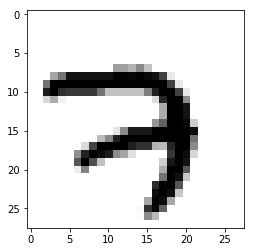

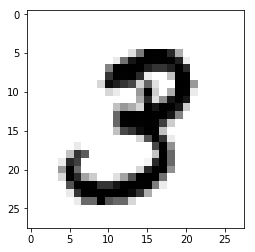

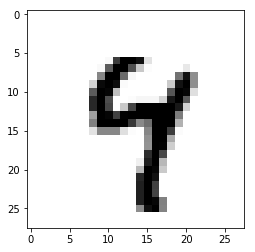

In [60]:
#Check Sample
some_digit_list = train_sample[:3]
for some_digit in some_digit_list:
    some_digit_image = some_digit.reshape(28,28) # reshape to square
    plt.imshow(some_digit_image,cmap = plt.cm.binary,interpolation="nearest")
    # plt.axis("off")
    plt.show()

In [61]:
train_sample.shape

(10000, 784)

In [66]:
train_sample_ = np.reshape(train_sample,[-1,28,28,1])
valid_sample_ = np.reshape(valid_sample,[-1,28,28,1])

In [63]:
train_sample_.shape

(10000, 28, 28, 1)

In [103]:
model.fit(train_sample_, labels_sample, epochs=30, batch_size=200, validation_data=(valid_sample_,labels_validsample))

Train on 10000 samples, validate on 5000 samples
Epoch 1/30
10000/10000 [==============================] - 13s 1ms/step - loss: 2.3037 - acc: 0.1023 - val_loss: 2.3067 - val_acc: 0.1474
Epoch 2/30
10000/10000 [==============================] - 13s 1ms/step - loss: 2.2993 - acc: 0.1148 - val_loss: 2.3071 - val_acc: 0.0532
Epoch 3/30
10000/10000 [==============================] - 13s 1ms/step - loss: 2.2958 - acc: 0.1231 - val_loss: 2.3184 - val_acc: 0.1026
Epoch 4/30
10000/10000 [==============================] - 13s 1ms/step - loss: 2.2897 - acc: 0.1292 - val_loss: 2.3253 - val_acc: 0.0336
Epoch 5/30
10000/10000 [==============================] - 13s 1ms/step - loss: 2.2792 - acc: 0.1429 - val_loss: 2.3196 - val_acc: 0.0828
Epoch 6/30
10000/10000 [==============================] - 13s 1ms/step - loss: 2.2665 - acc: 0.1543 - val_loss: 2.3054 - val_acc: 0.1120
Epoch 7/30
10000/10000 [==============================] - 13s 1ms/step - loss: 2.2461 - acc: 0.1665 - val_loss: 2.2922 - val_acc:

In [84]:
a = labels_sample[:]
labels_sample_shuffled = np.random.permutation(a)


In [106]:
model.fit(train_sample_, labels_sample_shuffled, epochs=30, batch_size=200, validation_data=(valid_sample_,labels_validsample))

Train on 10000 samples, validate on 5000 samples
Epoch 1/30
10000/10000 [==============================] - 13s 1ms/step - loss: 2.3045 - acc: 0.1049 - val_loss: 2.3013 - val_acc: 0.1262
Epoch 2/30
10000/10000 [==============================] - 13s 1ms/step - loss: 2.2997 - acc: 0.1144 - val_loss: 2.2993 - val_acc: 0.1576
Epoch 3/30
10000/10000 [==============================] - 13s 1ms/step - loss: 2.2970 - acc: 0.1179 - val_loss: 2.3019 - val_acc: 0.1006
Epoch 4/30
10000/10000 [==============================] - 13s 1ms/step - loss: 2.2932 - acc: 0.1214 - val_loss: 2.3100 - val_acc: 0.1272
Epoch 5/30
10000/10000 [==============================] - 13s 1ms/step - loss: 2.2866 - acc: 0.1291 - val_loss: 2.3166 - val_acc: 0.0820
Epoch 6/30
10000/10000 [==============================] - 13s 1ms/step - loss: 2.2779 - acc: 0.1385 - val_loss: 2.3307 - val_acc: 0.1084
Epoch 7/30
10000/10000 [==============================] - 13s 1ms/step - loss: 2.2644 - acc: 0.1535 - val_loss: 2.3239 - val_acc:

In [10]:
g = tf.Graph()
with g.as_default():
    X = tf.placeholder(tf.float32, [None,784])
    Y = tf.placeholder(tf.float32,[None,10])
    X_ = tf.reshape(X,[-1,28,28,1]) 
    # for convolution. This operation would not be required if we plan to use just a feed-fwd network
    
    dropout_prob = tf.placeholder(tf.float32)
    #dropout is a technique to avoid overfitting. A probability parameter is required for the same.
    #arguments are passed in the computational graph via a placeholder.
    #So far, X, Y, dropout_prob make use of the  placeholder.
    lr = tf.placeholder(tf.float32)
    
    F1 = 32 #num of filters/kernels/convolutions in 1st layer
    F2 = 64 #num of filters/kernels/convolutions in 2nd layer

    
    C1 = tf.Variable(tf.truncated_normal([5,5,1,F1], 0, 0.1, tf.float32))
    B1 = tf.Variable(tf.ones([F1])/10)
    
    C2 = tf.Variable(tf.truncated_normal([5,5,F1,F2], 0, 0.1, tf.float32))
    B2 = tf.Variable(tf.ones([F2])/10)
    
    W3 = tf.Variable(tf.truncated_normal([7*7*F2,10], 0, 0.1, tf.float32))
    B3 = tf.Variable(tf.ones([10])/10)

   
    #stride of 1 for both convolutions
    L1 = tf.nn.relu(tf.nn.conv2d(X_, C1, strides=[1,1,1,1], padding='SAME') + B1)
    L1_ = tf.nn.max_pool(L1,ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    
    L2 = tf.nn.relu(tf.nn.conv2d(L1_, C2, strides=[1,1,1,1], padding='SAME') + B2)
    L2_ = tf.nn.max_pool(L2, ksize = [1,2,2,1], strides = [1,2,2,1], padding='SAME')
    
    L3 = tf.reshape(L2_,shape=[-1,7*7*F2])
    
    #################1 feed fwd layer. No activation since the last layer.
    L4 = tf.matmul(L3, W3) + B3
    L = tf.nn.softmax(L4)    
    #for each data-point, L would be a 10-sized array of estimated probabilities for each digit
    #################

    #LOSS
    crossE = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=L4, labels=Y))
    
    correct_prediction = tf.equal(tf.argmax(L,1), tf.argmax(Y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    optimizer = tf.train.AdamOptimizer(lr)
    train_step = optimizer.minimize(crossE)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [11]:
bc = np.reshape(b, [784])

In [13]:
import math
# check_data = train_data[:5]
# check_L = train_L[:5]
# bb = tf.reshape(b, shape = [784])
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
#     builder = tf.saved_model.builder.SavedModelBuilder()
    
    batch_size = 100
    epochs = 10
    iterations = int(train_data.shape[0]/batch_size)
    batch_num = 0
    
    max_learning_rate = 0.004
    min_learning_rate = 0.0001
    decay_speed = 2000.0
    learning_rate = max_learning_rate
    
    for i in range(epochs):
        print("LR: ",learning_rate)
        for j in range(iterations):
            batch_num +=1
            start_idx = (i * batch_size) % (train_data.shape[0] - batch_size)
            end_idx = start_idx + batch_size
            
            x_train = train_data[start_idx:end_idx]
            y_train = train_L[start_idx:end_idx]
            
            learning_rate = min_learning_rate + (max_learning_rate - min_learning_rate) * math.exp(-batch_num/decay_speed)

            x = sess.run(train_step, feed_dict = {X:x_train, Y:y_train, dropout_prob: 0.5, lr: learning_rate})
        print ("Epoch"+str(i+1))
#         print ("batch: "+ str(batch_num+1))
        ans=sess.run(accuracy,feed_dict={X:test_data,Y:test_L,dropout_prob:1,lr:learning_rate}) # evaluate the testing dataset.
        print("ACCURACY: ", ans)
#         ans2 = sess.run(L1_, feed_dict = {X:[bc], Y: check_L[2:3], dropout_prob:1, lr: learning_rate})
#         checks = sess.run(L, feed_dict={X:check_data, Y: check_L, dropout_prob:1,lr: learning_rate})
#         print (checks)
#         check = sess.run(L6, feed_dict={X:[bc], Y: check_L[2:3], dropout_prob:1,lr: learning_rate})
#         print (check)
        
    

LR:  0.004
Epoch1
ACCURACY:  0.7749
LR:  0.003062331280577377
Epoch2
ACCURACY:  0.7726
LR:  0.002350104260483898
Epoch3
ACCURACY:  0.8298
LR:  0.0018091164706133022
Epoch4
ACCURACY:  0.8604
LR:  0.0013981972264225104
Epoch5
ACCURACY:  0.8815
LR:  0.0010860744236385112
Epoch6
ACCURACY:  0.8674
LR:  0.0008489946436209412
Epoch7
ACCURACY:  0.8839
LR:  0.0006689154517392868
Epoch8
ACCURACY:  0.9023
LR:  0.0005321323176131021
Epoch9
ACCURACY:  0.9091
LR:  0.0004282356620035104
Epoch10
ACCURACY:  0.9268


In [17]:
g.get_operations()

[<tf.Operation 'Placeholder' type=Placeholder>,
 <tf.Operation 'Placeholder_1' type=Placeholder>,
 <tf.Operation 'Reshape/shape' type=Const>,
 <tf.Operation 'Reshape' type=Reshape>,
 <tf.Operation 'Placeholder_2' type=Placeholder>,
 <tf.Operation 'Placeholder_3' type=Placeholder>,
 <tf.Operation 'truncated_normal/shape' type=Const>,
 <tf.Operation 'truncated_normal/mean' type=Const>,
 <tf.Operation 'truncated_normal/stddev' type=Const>,
 <tf.Operation 'truncated_normal/TruncatedNormal' type=TruncatedNormal>,
 <tf.Operation 'truncated_normal/mul' type=Mul>,
 <tf.Operation 'truncated_normal' type=Add>,
 <tf.Operation 'Variable' type=VariableV2>,
 <tf.Operation 'Variable/Assign' type=Assign>,
 <tf.Operation 'Variable/read' type=Identity>,
 <tf.Operation 'ones/shape_as_tensor' type=Const>,
 <tf.Operation 'ones/Const' type=Const>,
 <tf.Operation 'ones' type=Fill>,
 <tf.Operation 'truediv/y' type=Const>,
 <tf.Operation 'truediv' type=RealDiv>,
 <tf.Operation 'Variable_1' type=VariableV2>,
 <

## WIP: Predicting, Saving, Showcasing strengths and weaknesses 